
Bad key text.latex.unicode in file C:\Users\luisp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.dvipnghack in file C:\Users\luisp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 127 ("text.dvipnghack : None      # some versions of dvipng don't handle alpha")
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\luisp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 430 ('savefig.frameon : True')
You probably need to get an updated 

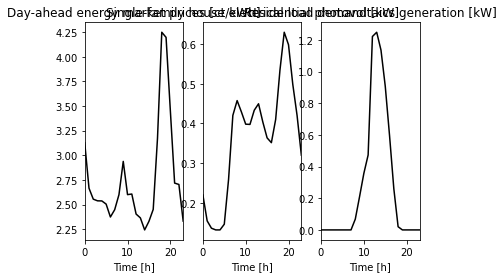

In [1]:
import matplotlib.pyplot as plt
from pycity_scheduling.classes import *
from pycity_scheduling.algorithms import *
t = Timer(op_horizon=24, step_size=3600, initial_date=(2018, 3, 15), initial_time=(0, 0, 0))
w = Weather(timer=t, location=(50.76, 6.07))
p = Prices(timer=t)
e = Environment(timer=t, weather=w, prices=p)
fi = FixedLoad(environment=e, method=1, annual_demand=3000.0, profile_type="H0")
pv = Photovoltaic(environment=e, method=1, peak_power=6.0)
ba = Battery(environment=e, e_el_max=8.4, p_el_max_charge=3.6, p_el_max_discharge=3.6)
plot_time = list(range(t.timesteps_used_horizon))
fig, axs = plt.subplots(1, 3)
axs[0].plot(plot_time, p.da_prices, color="black")
axs[0].set_title("Day-ahead energy market prices [ct/kWh]")
axs[1].plot(plot_time, fi.p_el_schedule, color="black")
axs[1].set_title("Single-family house electrical load demand [kW]")
axs[2].plot(plot_time, pv.p_el_supply, color="black")
axs[2].set_title("Residential photovoltaics generation [kW]")
for ax in axs.flat:
    ax.set(xlabel="Time [h]", xlim=[0, t.timesteps_used_horizon-1])
plt.show()

In [2]:
bd = Building(environment=e, objective="none")
bes = BuildingEnergySystem(environment=e)
ap = Apartment(environment=e)
bd.addMultipleEntities(entities=[bes, ap])
bes.addDevice(objectInstance=pv)
ap.addMultipleEntities(entities=[fi, ba])
cd = CityDistrict(environment=e, objective="price")
cd.addEntity(bd, position=(0, 0))

C:\Users\luisp\Miniconda3\lib\site-packages\pycity_base\classes\demand\apartment.py:103: UserWarning: Kind of entity is unknown. Entity has not been added!
  warnings.warn('Kind of entity is unknown. Entity has not been added!')


1001

In [3]:
opt = CentralOptimization(city_district=cd, mode="integer")
res = opt.solve()
cd.copy_schedule(dst="optim_schedule")

    solver scip


ApplicationError: No executable found for solver 'scip'



------ Example 00: Fundamentals ------


Weekday:
3

Outdoor temperature forecast:
[3.6 2.1 1.  0.1 0.  0.  0.2 0.1 0.1 0. ]

Day-ahead spot market prices on 2015/01/01:
[2.502     1.8290001 1.6040001 1.46      1.495     1.45      1.076
 1.201     1.2390001 1.404     1.468     1.608     1.608     1.6049999
 1.6040001 1.61      2.3930001 2.69      2.6360002 2.398     1.609
 1.408     1.244     0.004    ]

Electrical load in Watt:
[316.028805 227.846295 174.312204 ... 552.381822 465.609927 354.624798]


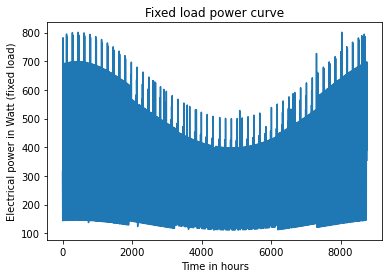


Space heating power curve in Watt:
[1894.03202642 1943.44155755 1992.85108867 ... 2483.68049022 1695.48051729
 1236.16974171]


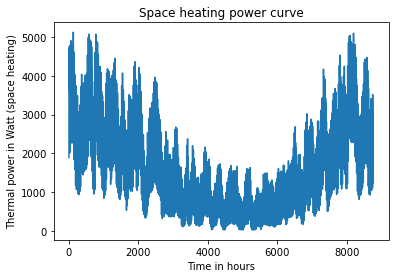


BES has heatpump? :  True
BES has thermal heating storage? :  True
BES has photovoltaic? :  True

Total number of buildings in city district:
4

Detailed city district information:
CD_00016
	BD_00008
		HP_00013
		THS_00014
		PV_00015
		FL_00011
		SH_00012
	BD_00023
		BL_00020
		PV_00019
		SH_00017
		FL_00018
	BD_00030
		BL_00027
		PV_00026
		SH_00024
		FL_00025
	BD_00037
		BL_00034
		PV_00033
		SH_00031
		FL_00032
    solver scip


ApplicationError: No executable found for solver 'scip'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from pycity_scheduling.classes import *
from pycity_scheduling.algorithms import *
import pycity_scheduling.util.debug as debug


# This is a fundamental tutorial on how to use the pycity_scheduling package.


def main(do_plot=False):
    print("\n\n------ Example 00: Fundamentals ------\n\n")

    # 1) Environment objects:


    # (Almost) every object within pycity_scheduling requires an environment. The environment object holds general data,
    # which is valid for all objects within pycity_scheduling, such as time data, weather data or energy market prices.
    # Therefore, all objects point to an environment. The first step is usually to generate such an environment.

    # Generate a timer object for the environment:
    timer = Timer(step_size=3600, op_horizon=24, initial_date=(2015, 1, 1), initial_time=(0, 0, 0))

    # Generate a weather object for the environment:
    weather = Weather(timer=timer)

    # Generate a price object for the environment:
    price = Prices(timer=timer)

    # Generate the environment object:
    environment = Environment(timer=timer, weather=weather, prices=price)


    # Now there is a distinct environment object with timer, weather and price data.
    # We can use it to access different data of interest.

    # For example, print the current weekday:
    print('Weekday:')
    print(environment.timer.weekday)

    # For example, print the weather forecast for the outdoor temperature (only extract the first 10 timestep values):
    print('\nOutdoor temperature forecast:')
    print(environment.weather.getWeatherForecast(getTAmbient=True)[0][:10])

    # For example, print the energy spot market day-ahead prices:
    print('\nDay-ahead spot market prices on 2015/01/01:')
    print(environment.prices.da_prices)


    # 2) Buildings objects:

    # After defining the environment, different building objects should be created. In pycity_scheduling, buildings
    # represent the different customers of the local energy system / city district under investigation.
    # In general, buildings should also be understood in a more abstract way. For instance, a building object must not
    # necessarily represent a building structure, as it would be the case for a wind energy converter.

    # Create a building object:
    building = Building(environment=environment)

    # This building is assumed to be equipped with a building energy system and one apartment (=single-family house).
    # In general, every building object can, however, hold up to N different apartments (=multi-family house).
    apartment = Apartment(environment=environment)
    bes = BuildingEnergySystem(environment=environment)

    building.addMultipleEntities([apartment, bes])


    # Every apartment usually possesses both electrical and thermal loads:
    # The electrical load is added to the apartment as follows:
    load = FixedLoad(environment=environment, method=1, annual_demand=3000)

    # Print and show the electrical power curve in Watt:
    print('\nElectrical load in Watt:')
    print(load.get_power(currentValues=False))
    plt.plot(load.get_power(currentValues=False))
    plt.xlabel('Time in hours')
    plt.ylabel('Electrical power in Watt (fixed load)')
    plt.title('Fixed load power curve')
    if do_plot:
        plt.show()

    # The thermal load is added to the apartment as follows:
    space_heating = SpaceHeating(environment=environment, method=1, living_area=150, specific_demand=100)

    # Print and show space heating power curve in Watt:
    print('\nSpace heating power curve in Watt:')
    print(space_heating.get_power(currentValues=False))

    plt.plot(space_heating.get_power(currentValues=False))
    plt.xlabel('Time in hours')
    plt.ylabel('Thermal power in Watt (space heating)')
    plt.title('Space heating power curve')
    if do_plot:
        plt.show()

    apartment.addMultipleEntities([load, space_heating])


    # The BuildingEnergySystem (BES) class is a 'container' for all kind of building energy systems (i.e., electrical
    # and/or thermal assets). For example, we can add an electro-thermal heating system (such as a heatpump plus thermal
    # energy storage) and a photovoltaic unit to a building's BES as done below. In pycity_scheduling all BES devices
    # automatically come with basic scheduling models, which include the required Pyomo optimization variables and
    # several optimization constraints.
    eh = HeatPump(environment=environment, p_th_nom=16.0)
    ths = ThermalHeatingStorage(environment=environment, e_th_max=20.0, soc_init=0.5, loss_factor=0)
    pv = Photovoltaic(environment=environment, method=0, peak_power=8.0)

    bes.addMultipleDevices([eh, ths, pv])

    # Verify if the assets were added successfully (method getHasDevice):
    print('\nBES has heatpump? : ', bes.getHasDevices(all_devices=False, heatpump=True)[0])
    print('BES has thermal heating storage? : ', bes.getHasDevices(all_devices=False, ths=True)[0])
    print('BES has photovoltaic? : ', bes.getHasDevices(all_devices=False, pv=True)[0])


    # 3) CityDistrict objects:

    # In pycity_scheduling, a group of buildings form a CityDistrict object. The CityDistrict is the object to be
    # "provided" to a power scheduling algorithm later on. In other word, it encapsulates all buildings together with
    # their local assets and it hence includes all the optimization problem information and data.

    # Create a city district object:
    cd = CityDistrict(environment=environment)

    # Add the building from above to the city district at a certain position/coordinate (x, y).
    cd.addEntity(entity=building, position=[0, 0])

    # Define and add three other buildings:
    for i in range(3):
        heat_demand = SpaceHeating(environment=environment, method=1, living_area=150, specific_demand=100)

        el_load_demand = FixedLoad(environment=environment, method=1, annual_demand=3000)

        pv = Photovoltaic(environment=environment, method=0, peak_power=5.0)
        bl = Boiler(environment=environment, p_th_nom=24.0)

        ap = Apartment(environment=environment)
        ap.addEntity(heat_demand)
        ap.addEntity(el_load_demand)

        bes = BuildingEnergySystem(environment=environment)
        bes.addDevice(pv)
        bes.addDevice(bl)

        bd = Building(environment=environment)
        bd.addEntity(entity=ap)
        bd.addEntity(entity=bes)

        cd.addEntity(entity=bd, position=[0, i])

    # Print the city district information:
    print('\nTotal number of buildings in city district:')
    print(cd.get_nb_of_building_entities())
    print("\nDetailed city district information:")
    debug.print_district(cd, 3)


    # 4) Power scheduling:

    # The final step is to schedule the buildings/assets inside the city district subject to a certain optimization
    # objective, which can be, for example, peak-shaving. The scheduling is then performed by the user by "passing"
    # the city district object to a certain power scheduling algorithm.
    # Here, the central optimization algorithm is used.

    # Set the city district / district operator objective and perform the power scheduling using the central
    # optimization algorithm:
    cd.set_objective("peak-shaving")
    opt = CentralOptimization(cd)
    opt.solve()

    # The scheduling results obtained from the algorithm run can be (temporally) stored as follows:
    cd.copy_schedule("my_central_scheduling")

    # Print and show the scheduling result (city district power values for every time slot within the defined
    # optimization horizon):
    print("\nPower schedule of city district:")
    print(list(cd.p_el_schedule))

    plt.plot(cd.p_el_schedule, drawstyle='steps')
    plt.xlabel('Time in hours')
    plt.ylabel('Electrical power in Kilowatt')
    plt.title('Electrical Power Schedule of CityDistrict')
    if do_plot:
        plt.show()
    return


if __name__ == '__main__':
    # Run example:
    main(do_plot=True)

In [5]:
 solver = SolverFactory('scip', executable="./scip")

NameError: name 'SolverFactory' is not defined